# Taller pandas
## Por Andrés Felipe Nieto Grandas

## 1. Diga qué índices serían pertienentes tener y pongalos.

In [2]:
#Importamos las librerias necesarias para el Taller
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

#Convertimos el archivo csv en un dataframe de pandas con indice de la columna "No"
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv", index_col="No")

In [3]:
#Observamos el dataframe con su indice
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


## 2. Elimine registros que tengan NA en la columna "pm2.5"

In [4]:
#ahora vamos a proceder a filtrar la informacion eleminando los registros que contengan NaN de la columna pm2.5
#df_filtrado = df[df["pm2.5"].notna()]
#print(df_filtrado.shape)
#print(df.shape)

#Eliminar los registros definitivamente de la base
df.dropna(subset=["pm2.5"], axis=0,inplace=True)

In [5]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


## 3. Relice un describe de todas las variables por año. Además de realizar un gráfico como boxplot con el que pueda comparar los resultados dados. 

In [6]:
df_notna = df.groupby('year').describe()
df_notna

month                                                    day  \
       count      mean       std  min  25%  50%   75%   max   count   
year                                                                  
2010  8091.0  6.494747  3.480238  1.0  3.0  6.0  10.0  12.0  8091.0   
2011  8032.0  6.601096  3.477195  1.0  4.0  7.0  10.0  12.0  8032.0   
2012  8295.0  6.452200  3.425475  1.0  3.0  6.0   9.0  12.0  8295.0   
2013  8678.0  6.517516  3.446639  1.0  4.0  7.0  10.0  12.0  8678.0   
2014  8661.0  6.505715  3.442517  1.0  4.0  7.0   9.0  12.0  8661.0   

                 ...   Is            Ir                                     \
           mean  ...  75%   max   count      mean       std  min  25%  50%   
year             ...                                                         
2010  15.590656  ...  0.0  27.0  8091.0  0.269312  1.836257  0.0  0.0  0.0   
2011  15.966633  ...  0.0  20.0  8032.0  0.149278  1.110730  0.0  0.0  0.0   
2012  15.471248  ...  0.0  19.0  8295.0  0.265943  1.766490  0.0  0.0  0.0   
2013  15.674464  ...  0.0  11.0  8678.0  0.161904  1.150911  0.0  0.0  0.0   
2014  15.729708  ...  0.0  23.0  8661.0  0.132548  1.034723  0.0  0.0  0.0   

                 
      75%   max  
year             
2010  0.0  36.0  
2011  0.0  23.0  
2012  0.0  32.0  
2013  0.0  25.0  
2014  0.0  23.0  

[5 rows x 80 columns]

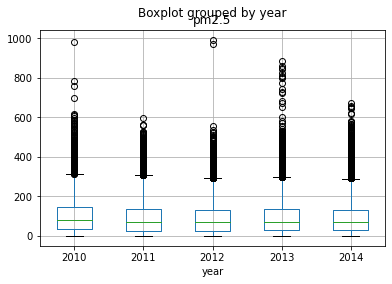

In [7]:
df.boxplot(column=['pm2.5'], by='year')

## 4. Realice un gráfico de disperción de las variables "pm2.5" y "TEMP" con título, labels apropiados y color rojo para los datos. Describa: ¿Qué se puede inferir de dicho gráfico?

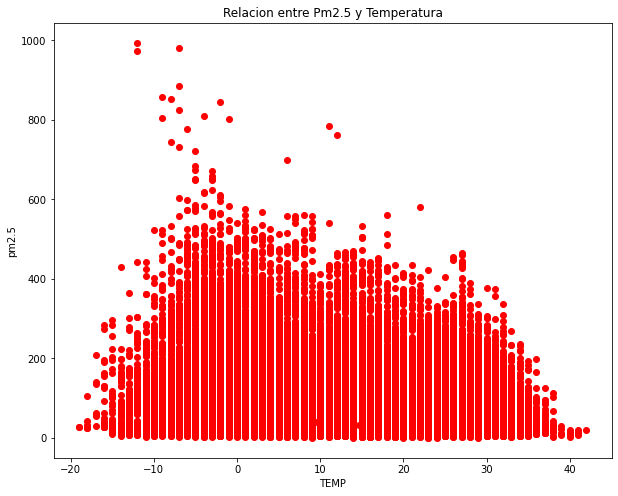

In [8]:
y = df['pm2.5']
x = df['TEMP']

plt.figure(figsize=(10, 8))
plt.scatter(x, y , color='red')

plt.title('Relacion entre Pm2.5 y Temperatura')
plt.ylabel('pm2.5')
plt.xlabel('TEMP')
plt.show()

## 5. Calcule la probabilidad de encontrar en la Base de datos el valor de pm2.5 encima de 120

In [32]:
df_pm = df[(df['pm2.5']) > 120]
round(len(df_pm)/len(df),3)

0.299

## 6. Para finalizar, agrupe por año el valor de la variable "pm2.5", calcule el promedio y ordene la base de datos de manera ascendente por el promedio.

In [30]:
df_pro_pm = df.groupby(['year']).mean()
df_pro_pm.head()


,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
year,,,,,,,,,,
2010,6.494747,15.590656,11.493511,104.045730,1.352120,11.313805,1016.291373,29.214860,0.077123,0.269312
2011,6.601096,15.966633,11.509836,99.071340,2.033118,12.407869,1017.461653,25.491912,0.056399,0.149278
2012,6.452200,15.471248,11.506088,90.545871,1.953707,12.109946,1016.080289,24.610321,0.076070,0.265943
2013,6.517516,15.674464,11.497580,101.712376,1.342590,12.383614,1015.817066,21.058177,0.035262,0.161904
2014,6.505715,15.729708,11.504676,97.734557,2.073086,13.709156,1016.614017,19.465400,0.034292,0.132548


In [31]:
df_pro_pm.sort_values(by=['pm2.5'], ascending=True)

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
year,,,,,,,,,,
2012,6.452200,15.471248,11.506088,90.545871,1.953707,12.109946,1016.080289,24.610321,0.076070,0.265943
2014,6.505715,15.729708,11.504676,97.734557,2.073086,13.709156,1016.614017,19.465400,0.034292,0.132548
2011,6.601096,15.966633,11.509836,99.071340,2.033118,12.407869,1017.461653,25.491912,0.056399,0.149278
2013,6.517516,15.674464,11.497580,101.712376,1.342590,12.383614,1015.817066,21.058177,0.035262,0.161904
2010,6.494747,15.590656,11.493511,104.045730,1.352120,11.313805,1016.291373,29.214860,0.077123,0.269312
